In [1]:
!pip install sqlalchemy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sqlalchemy import create_engine
import pandas as pd
from tabulate import tabulate

database_path = "sahayak.db"

engine = create_engine(f"sqlite:///{database_path}")

### View All the Tables

In [2]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, engine)
print(tables)

         name
0        user
1  fundraiser
2    donation


### Number of Fundraisers

In [65]:
query = "SELECT COUNT(*) as total_fundraisers FROM fundraiser;"
fundraisers = pd.read_sql(query, engine)
print(fundraisers)

   total_fundraisers
0                  9


### Deleted Fundraisers

### Total Donations Made

In [67]:
query = "SELECT SUM(amount) as total_donations FROM donation;"
total_donations = pd.read_sql(query, engine)
print(total_donations)

   total_donations
0         249556.0


### Top Donors

In [69]:
query = """
SELECT user_id, SUM(amount) as total_donated 
FROM donation 
GROUP BY user_id 
ORDER BY total_donated DESC 
LIMIT 5;
"""
top_donors = pd.read_sql(query, engine)
print(top_donors)

   user_id  total_donated
0        2       236222.0
1        1        13334.0


### Fundraisers by Category

In [71]:
query = "SELECT category, COUNT(*) as total FROM fundraiser GROUP BY category;"
categories = pd.read_sql(query, engine)

# Display the result in a user-friendly tabular format
categories.columns = ["Category", "Total Fundraisers"]  # Renaming columns for better readability
categories.set_index("Category", inplace=True)          # Setting 'Category' as the index for cleaner display

# Optional: Convert to Markdown format for better display in a notebook
print(tabulate(categories, headers='keys', tablefmt='grid'))

+----------------+---------------------+
| Category       |   Total Fundraisers |
+================+=====================+
| Animal Welfare |                   2 |
+----------------+---------------------+
| Education      |                   4 |
+----------------+---------------------+
| Health         |                   3 |
+----------------+---------------------+


### Fundraisers view

In [73]:
query = """
SELECT 
    id AS Fundraiser_ID,
    title AS Fundraiser_Title,
    total_donated AS Total_Donated,
    goal AS Goal_Amount,
    flag AS Status
FROM 
    fundraiser
"""

# Execute the query
finished_fundraisers = pd.read_sql(query, engine)

# Rename columns for better readability
finished_fundraisers.columns = ["Fundraiser ID", "Fundraiser Title", "Total Donated", "Goal Amount", "Status"]

# Print the result in tabular format
print(tabulate(finished_fundraisers, headers='keys', tablefmt='grid'))

# Optional: Export to CSV if needed
finished_fundraisers.to_csv("finished_fundraisers.csv", index=False)

+----+-----------------+--------------------+-----------------+---------------+----------+
|    |   Fundraiser ID | Fundraiser Title   |   Total Donated |   Goal Amount | Status   |
+====+=================+====================+=================+===============+==========+
|  0 |               1 | PC                 |               0 |        200000 | deleted  |
+----+-----------------+--------------------+-----------------+---------------+----------+
|  1 |               2 | PC                 |            5000 |         10000 | deleted  |
+----+-----------------+--------------------+-----------------+---------------+----------+
|  2 |               3 | Fee                |           40000 |         40000 | finished |
+----+-----------------+--------------------+-----------------+---------------+----------+
|  3 |               4 | PC                 |          150000 |        150000 | finished |
+----+-----------------+--------------------+-----------------+---------------+----------+

### To update the flag for fundraisers where goal has reached

In [75]:
from sqlalchemy import text

# Define the query to update the flag for finished fundraisers
update_query = text("""
    UPDATE fundraiser
    SET flag = 'finished'
    WHERE total_donated >= goal
    and flag == 'active';
""")

# Execute the query
with engine.connect() as conn:
    conn.execute(update_query)
    conn.commit()  # Explicitly commit changes

# Commit the changes to save them in the database
engine.dispose()

print("Flags updated successfully for fundraisers with total_donated >= goal.")

Flags updated successfully for fundraisers with total_donated >= goal.


## *Visualizations*

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

### Donations by Fundraiser

C:\Users\liger\AppData\Local\Temp\ipykernel_12660\3059331471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_donated', y='title', data=data, palette="viridis")


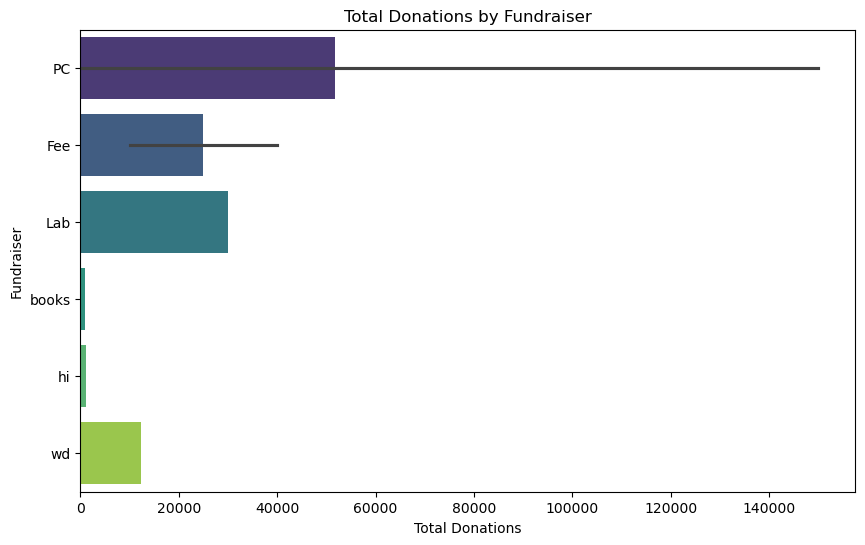

In [79]:
query = "SELECT title, total_donated FROM fundraiser;"
data = pd.read_sql(query, engine)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_donated', y='title', data=data, palette="viridis")
plt.title("Total Donations by Fundraiser")
plt.xlabel("Total Donations")
plt.ylabel("Fundraiser")
plt.show()

### Fundraisers by Categories

C:\Users\liger\AppData\Local\Temp\ipykernel_12660\1133744996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total', y='category', data=data, palette="magma")


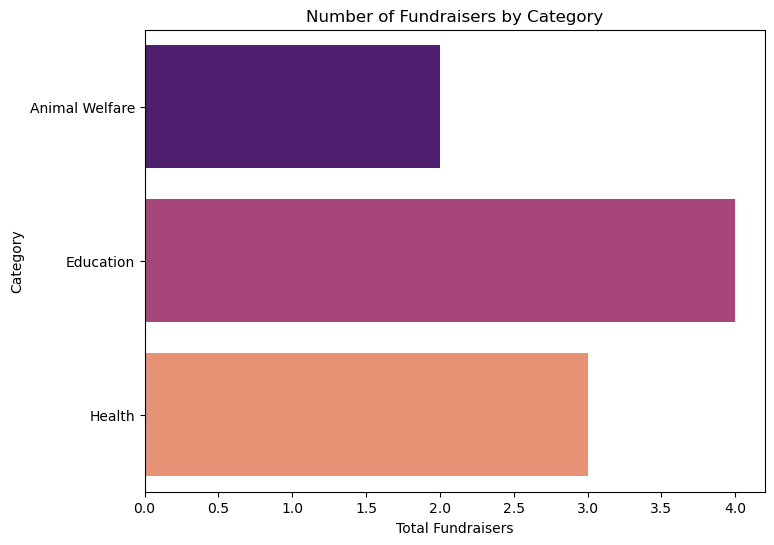

In [81]:
query = "SELECT category, COUNT(*) as total FROM fundraiser GROUP BY category;"
data = pd.read_sql(query, engine)

plt.figure(figsize=(8, 6))
sns.barplot(x='total', y='category', data=data, palette="magma")
plt.title("Number of Fundraisers by Category")
plt.xlabel("Total Fundraisers")
plt.ylabel("Category")
plt.show()

### Top Donors

C:\Users\liger\AppData\Local\Temp\ipykernel_12660\1702743823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_donated', y='user_id', data=data, palette="coolwarm")


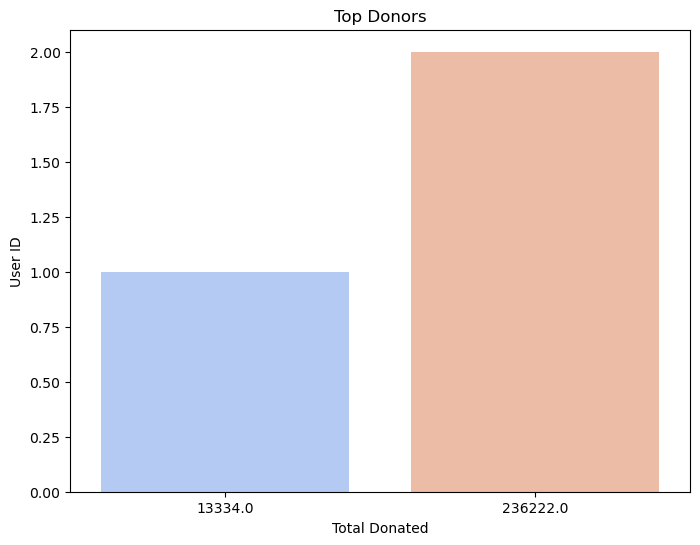

In [83]:
query = """
SELECT user_id, SUM(amount) as total_donated 
FROM donation 
GROUP BY user_id 
ORDER BY total_donated DESC 
LIMIT 5;
"""
data = pd.read_sql(query, engine)

plt.figure(figsize=(8, 6))
sns.barplot(x='total_donated', y='user_id', data=data, palette="coolwarm")
plt.title("Top Donors")
plt.xlabel("Total Donated")
plt.ylabel("User ID")
plt.show()

In [21]:
from sqlalchemy import inspect

# Inspect the donation table
inspector = inspect(engine)
columns = inspector.get_columns('donation')

# Display column details
for column in columns:
    print(f"Name: {column['name']}, Type: {column['type']}, Nullable: {column['nullable']}")

Name: id, Type: INTEGER, Nullable: False
Name: user_id, Type: INTEGER, Nullable: False
Name: amount, Type: FLOAT, Nullable: False
Name: fundraiser_id, Type: INTEGER, Nullable: False
Name: timestamp, Type: DATETIME, Nullable: True
